## Optical Diffraction
Simulation of monochromatic and coherent optical diffraction by
angular spectrum algorithm.

In [1]:
import numpy as np
from fringe.utils.io import import_image
from fringe.utils.modifiers import ImageToArray, Normalize, MakeComplex
from fringe.solvers.AngularSpectrum import AngularSpectrumSolver as AsSolver
from matplotlib import pyplot as plt

### Optical Propagation
A given object field can be propagated by a complex convolution with the
free-space optical transfer function:

obj * exp(iz x k_z) = obj * exp(iz x √(k^2 - k_x^2 - k_y^2))

where z is the axial distance. 'AngularSpectrumSolver' class, solves this
convolution by a multiplication in the Fourier space.

#### Step 1: Import Images
- Images can be imported, standardized, normalized, and made complex by the
  dedicated data pipeline designed in this package.
- import_image is the main import function which is able to apply
  post-processing functions on images on import.

In [2]:
# Standardization
p1 = ImageToArray(bit_depth=8, channel='gray', crop_window=None, dtype='float32')
# Normalization
p2 = Normalize(background=np.ones((512, 512)))
# Complex Field Generation
p3 = MakeComplex(set_as='amplitude', phase=0)

# Import with the settings
obj = import_image("images/squares.png", modifiers=[p1, p2, p3])

#### Solve
- Initialize angular spectrum solver.
- Call solver.solve() and pass the input field, wave number, and z distance.

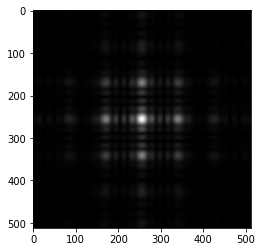

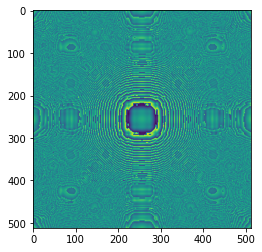

In [3]:
# Initialize Angular Spectrum Solver
solver = AsSolver(shape=obj.shape, dr=1, is_batched=False, padding="same",
                  pad_fill_value=0, backend="Numpy")

# Propagate with a given set of k (wavenumber) and z (axial distance)
rec = solver.solve(input_=obj, k=2 * np.pi/500e-3, z=-1000)
amp = np.abs(rec) # Must get squared to simulate intensity acquisition
phase = np.angle(rec) # Phase unwrapping should be applied at this stage

plt.imshow(amp, cmap='gray')
plt.show()
plt.imshow(phase)
plt.show()
